### Clone Git Repositary and unzip dataset (from Google Drive)

In [1]:
!git clone https://github.com/dearrdeer/chess_board_detection

Cloning into 'chess_board_detection'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 1), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [2]:
%cd chess_board_detection

/content/chess_board_detection


In [3]:
! cp /content/drive/MyDrive/idchess_zadanie.zip .

In [4]:
!mkdir /content/chess_board_detection/idchess_zadanie

In [5]:
!unzip idchess_zadanie.zip -d /content/chess_board_detection/idchess_zadanie

Archive:  idchess_zadanie.zip
  inflating: /content/chess_board_detection/idchess_zadanie/ytrain.npy  
  inflating: /content/chess_board_detection/idchess_zadanie/xtest.npy  
  inflating: /content/chess_board_detection/idchess_zadanie/xtrain.npy  


### Training

In [ ]:
!pip install pytorch-lightning

In [7]:
!python train.py -p ./idchess_zadanie -e 10 -b 32 -g 1

Preparing datasets...
tcmalloc: large alloc 3968073728 bytes == 0x55df96ad4000 @  0x7fccc5f1f1e7 0x7fccc3adf46e 0x7fccc3b33e7c 0x7fccc3b34aaf 0x7fccc3bd6470 0x55df908c10a4 0x55df908c0da0 0x55df90935868 0x55df9092fc35 0x55df908c273a 0x55df9093193b 0x55df9092fc35 0x55df908c273a 0x55df90934f40 0x55df9092fc35 0x55df908c273a 0x55df90930b0e 0x55df9092fc35 0x55df908c273a 0x55df90930b0e 0x55df908c265a 0x55df90930b0e 0x55df9092fc35 0x55df9092f933 0x55df909f9402 0x55df909f977d 0x55df909f9626 0x55df909d1313 0x55df909d0fbc 0x7fccc4d09bf7 0x55df909d0e9a
Datasets are ready.
Starting training
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type        | Params
-----------------------------------------
0 | mbnet    | MobileNetV3 | 1.8 M 
1 | detector | Sequential  | 2.1 K 
-----------------------------------------
1.8 M     Trainable params
0         Non-trainable params
1.8 M     Tot

### Sample Inference

In [9]:
from model import BoardDetector

model = BoardDetector().load_from_checkpoint('./simple_mbnet.ckpt')

In [13]:
from dataset.utils import prepare_datasets
train_ds, val_ds, test_ds = prepare_datasets('/content/chess_board_detection/idchess_zadanie')

In [20]:
from torch.utils.data import DataLoader
import numpy as np

test_loader = DataLoader(test_ds, 5)
xtest = np.load('/content/chess_board_detection/idchess_zadanie/xtest.npy')

In [17]:
batch = next(iter(test_loader))
pred = model(batch).detach().numpy()

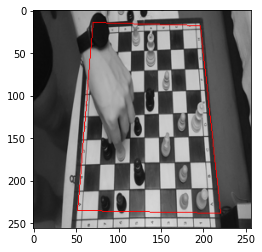

In [21]:
from dataset.utils import show_marked_image

show_marked_image(xtest[0], pred[0])

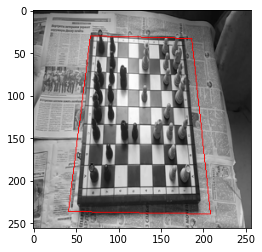

In [22]:
show_marked_image(xtest[1], pred[1])

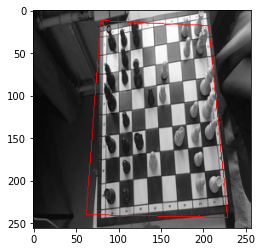

In [23]:
show_marked_image(xtest[2], pred[2])

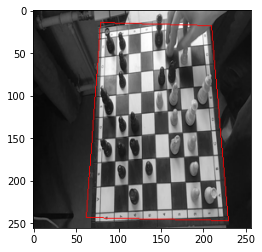

In [24]:
show_marked_image(xtest[3], pred[3])

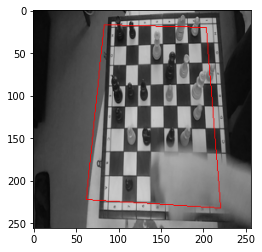

In [25]:
show_marked_image(xtest[4], pred[4])

In [26]:
# save predictions to ytest.npy
with open('ytest.npy', 'wb') as f:
  np.save(f, pred)